In [12]:
import numpy as np
from scipy import stats
import statsmodels
from matplotlib import pyplot as plt
from statsmodels.stats.power import TTestIndPower
from numpy import random
import math
import pandas as pd
import seaborn as sns
sns.set()
from statsmodels.stats.weightstats import ztest
%matplotlib inline

In [5]:
a = [8.2, 8.0, 7.9, 7.7, 7.9, 7.8, 7.2, 8.1, 7.9, 8.0, 8.0, 8.3, 8.1, 8.1, 7.8, 8.1, 7.6, 8.0, 8.7, 7.5, 7.9, 8.3, 8.2, 7.4, 7.9, 8.3, 7.4, 7.5, 7.8, 7.3]
df = pd.DataFrame(a)

9-51
==

In [2]:
# Notice that I do not use headers
df = pd.read_excel('C:/Users/RIB/OneDrive/Documents/Arbejde/Stochastic modeling and processes/Old/Excel/EX09_51.XLS', header=None)

In [3]:
a = df[0] # I create an array since this is easier to work with - could also use df[0]

In [16]:
# a)
# We calculate the p-value and the test statistic (and also the critical calue corresponding to alpha)
n = len(a)
SE = stats.sem(a)
mean = np.mean(a)
n, SE, mean

(30, 0.06186439254639214, 7.896666666666667)

In [13]:
ztest_Score, p_value= ztest(a,value = 7.5, alternative='larger')

In [14]:
ztest_Score

6.411873621311434

In [15]:
p_value

7.187098809234197e-11

In [5]:
alpha = 0.05
stat = abs(round(val[0],2))
pvalue = round(val[1],3)
crit = abs(round(stats.t.ppf(alpha/2,n-1), 2))

In [7]:
stat

3.48

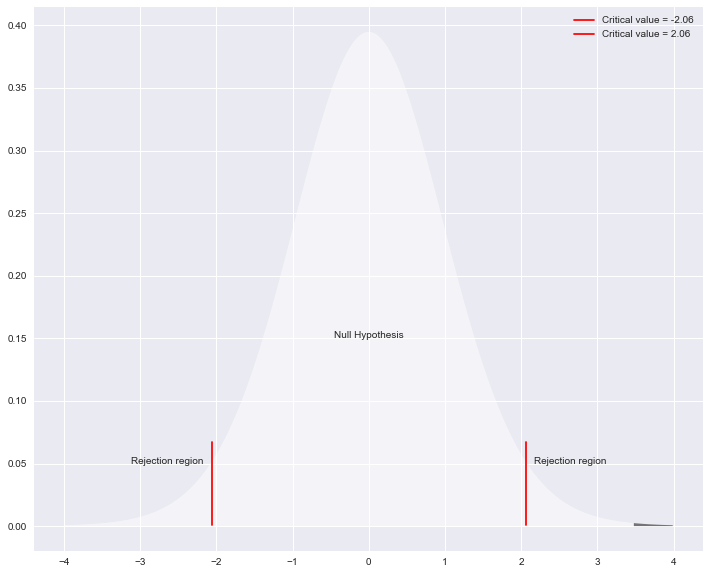

In [32]:
plt.figure(figsize=(12,10))

plt.fill_between(x=np.arange(stat,4,0.01), 
                 y1= stats.t.pdf(np.arange(stat,4,0.01),n-1) ,
                 facecolor='black',
                 alpha = 0.5)

plt.fill_between(x=np.arange(-4,stat,0.01), 
                 y1= stats.t.pdf(np.arange(-4,stat,0.01),n-1) ,
                 facecolor='white',
                 alpha=0.5)

xcoords = [-crit, crit]
colors = ['r','r']

for xc,c in zip(xcoords,colors):
    plt.axvline(x=xc, label='Critical value = {}'.format(xc), c=c, ymax = 0.2, ymin = 0.047)

plt.legend()
            
plt.text(x=0, y=0.15, s= "Null Hypothesis", ha = 'center')
plt.text(x=crit*1.05, y=0.05, s= "Rejection region")
plt.text(x=-crit*1.05, y=0.05, s= "Rejection region", ha = 'right')
plt.show()

1. $\quad H_0: \mu = 98.6$ <br/> $\quad H_1: \mu \neq 98.6$

2. $\quad \alpha =$ {{alpha}}

3. $\quad p-value =$ {{pvalue}} and $stat =$ {{stat}}

4. $\quad$Reject if p-value < {{alpha}} or if stat > {{crit}}

5. $\quad$We reject the null hypothesis since {{pvalue}} < {{alpha}} and conclude that the average female body temperature is not 98.6

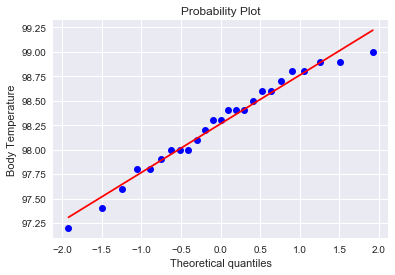

Skewness = -0.3983
Kurtosis = -0.5808


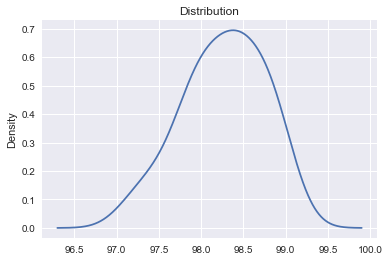

In [33]:
# b) We check for normality using a normal probability plot and compute skewness and kurtosis and then create a plot of the pdf
stats.probplot(a, plot=plt)
plt.ylabel('Body Temperature')
plt.show()
print('Skewness = ' + repr(round(stats.skew(a),4)))
print('Kurtosis = ' + repr(round(stats.kurtosis(a),4)))
df = pd.DataFrame(a)
fig, ax = plt.subplots()
df.plot.kde(ax=ax, legend=False, title='Distribution');

In [8]:
# c) Find the power if the true mean is 98.0 - note not part of curriculum.
# Statistical power, or the power of a hypothesis test is the probability that the test
# correctly rejects the null hypothesis: P(Reject | H0 is false)

# parameters for power analysis
n = len(a)
sigma = np.std(a, ddof = 1)
hypmean = 98.6
mu = 98.0
effect = abs(mu-hypmean)/sigma
alpha = 0.05
# perform power analysis
analysis = TTestIndPower()
result = analysis.solve_power(effect, power=None, nobs1=n, ratio=1.0, alpha=alpha)
print('Power = %.3f' % result)

Power = 0.991


In [9]:
# d) Find sample size if beta is 0.9 and we allow true mean as low as 98.2
mu = 98.2
effect = abs(mu-hypmean)/sigma
result = analysis.solve_power(effect, power=0.9, nobs1=None, ratio=1.0, alpha=alpha)
print('Sample Size = ' + repr(math.ceil(result)))

Sample Size = 32


A 95.0 % confidence interval for the sample mean is [98.065 ; 98.463]


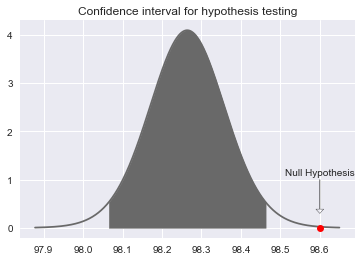

We can conclude that the mean female body temperature is not equal to 98.6 since the value is not included inside the confidence interval.


In [34]:
# e) Setup a 95 % CI on the mean and use it to test the null hypothesis

n = len(a)
SE = stats.sem(a)
mean = np.mean(a)
Level = 0.95

CI = stats.t.interval(Level, n-1, loc=mean, scale=SE)

print('A ' + repr(Level*100) + ' % confidence interval for the sample mean is [' + repr(round(CI[0],3)) + ' ; '
      + repr(round(CI[1],3)) + ']')

x = np.linspace(mean-4*SE, mean+4*SE, 1000)
z = x[(CI[0] <= x) & (x <= CI[1])]
y = stats.t.pdf(x,n-1, mean, SE)
plt.plot(x,y, color = 'dimgrey')
plt.fill_between(z, stats.t.pdf(z,n-1, mean,SE), color = 'dimgrey')
plt.title('Confidence interval for hypothesis testing')
plt.plot(98.6, 0, 'ro')
plt.arrow(98.6, 1, 0, -0.7, length_includes_head = True, head_width = 0.02, head_length = 0.09, fill = False)
plt.text(x=98.6, y=1.1, s= "Null Hypothesis", ha = 'center')
plt.show()



print('We can conclude that the mean female body temperature is not equal to 98.6' +
      ' since the value is not included inside the confidence interval.')

9-52
==

In [35]:
df = pd.read_excel('C:/Users/RIB/OneDrive/Documents/Arbejde/Stochastic modeling and processes/Old/Excel/EX09_52.XLS', header=None)
a = df[0]

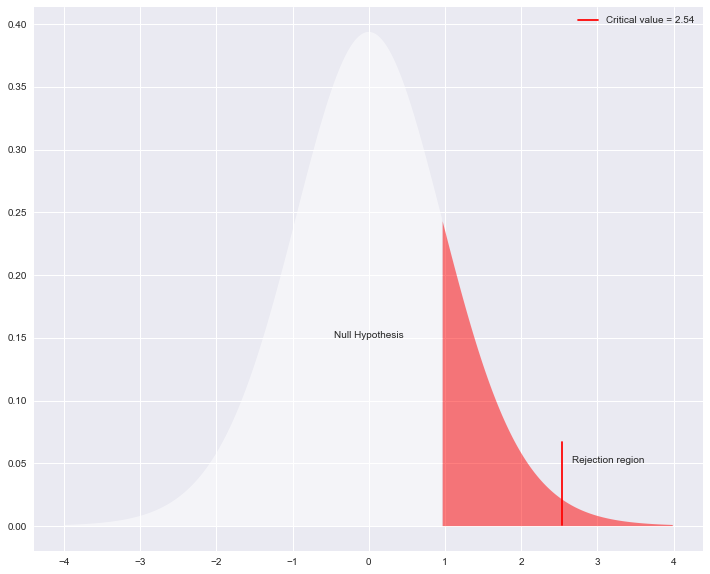

In [36]:
n = len(a)
SE = stats.sem(a)
mean = np.mean(a)
val = stats.ttest_1samp(a, 25)

alpha = 0.01
stat = abs(round(val[0],2))
pvalue = round(val[1],3)/2 # please notce that I divide by 2. This is because that it assumes that it is a two-tailed test
crit = abs(round(stats.t.ppf(alpha,n-1), 2))

plt.figure(figsize=(12,10))

plt.fill_between(x=np.arange(stat,4,0.01), 
                 y1= stats.t.pdf(np.arange(stat,4,0.01),n-1) ,
                 facecolor='red',
                 alpha = 0.5)

plt.fill_between(x=np.arange(-4,stat,0.01), 
                 y1= stats.t.pdf(np.arange(-4,stat,0.01),n-1) ,
                 facecolor='white',
                 alpha=0.5)

plt.axvline(x=crit, label='Critical value = {}'.format(crit), ymax = 0.2, ymin = 0.047, color = 'r')

plt.legend()
            
plt.text(x=0, y=0.15, s= "Null Hypothesis", ha = 'center')
plt.text(x=crit*1.05, y=0.05, s= "Rejection region")
plt.show()

1. $\quad H_0: \mu \leq 25$ <br/> $\quad H_1: \mu > 25$

2. $\quad \alpha =$ {{alpha}}

3. $\quad p-value =$ {{pvalue}} and $stat =$ {{stat}}

4. $\quad$Reject if p-value < {{alpha}} or if stat > {{crit}}

5. $\quad$We do not reject the null hypothesis since {{pvalue}} > {{alpha}} and conclude that we do not have sufficient evidence to conclude that the mean rainfall from <br/> $\quad$seeded clouds exceed 25 acre-feet.

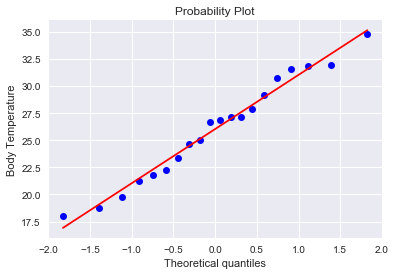

Skewness = -0.0102
Kurtosis = -0.9628


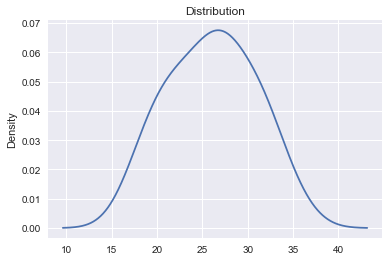

In [37]:
# b) We check for normality using a normal probability plot and compute skewness and kurtosis and then create a plot of the pdf
stats.probplot(a, plot=plt)
plt.ylabel('Body Temperature')
plt.show()
print('Skewness = ' + repr(round(stats.skew(a),4)))
print('Kurtosis = ' + repr(round(stats.kurtosis(a),4)))
df = pd.DataFrame(a)
fig, ax = plt.subplots()
df.plot.kde(ax=ax, legend=False, title='Distribution');

In [14]:
# c) Skip

In [15]:
# d) Skip

A 99.0 % lower confidence interval for the sample mean is 23.318 ≤ μ 


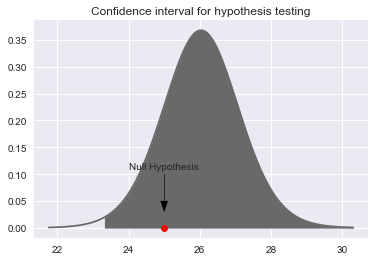

As we can see below, the Null Hypothesis lies inside the Confidence interval and should therefore not be rejected


In [38]:
# e) Setup a 99 % one-sided CI on the mean and use it to test the null hypothesis

n = len(a)
SE = stats.sem(a)
mean = np.mean(a)
Level = 0.98 # Please notice THIS

CI = stats.t.interval(Level, n-1, loc=mean, scale=SE)

print('A ' + repr(Level*100+1) + ' % lower confidence interval for the sample mean is '+ repr(round(CI[0],3)) + ' \u2264 \u03bc ')

x = np.linspace(mean-4*SE, mean+4*SE, 1000)

z = x[x >= CI[0]]
y = stats.t.pdf(x,n-1, mean, SE)
plt.plot(x,y, color = 'dimgrey')
plt.fill_between(z, stats.t.pdf(z,n-1, mean,SE), color = 'dimgrey')
plt.title('Confidence interval for hypothesis testing')
plt.plot(25, 0, 'ro')
plt.arrow(25, 0.1, 0, -0.07, length_includes_head = True, head_width = 0.2, head_length = 0.02, color='k')
plt.text(x=25, y=0.11, s= "Null Hypothesis", ha = 'center')
plt.show()

print('As we can see below, the Null Hypothesis lies inside the Confidence interval and should therefore not be rejected')

9-53
==

In [41]:
df = pd.read_excel('C:/Users/RIB/OneDrive/Documents/Arbejde/Stochastic modeling and processes/Old/Excel/EX09_53.XLS', header=None)
a = df[0]

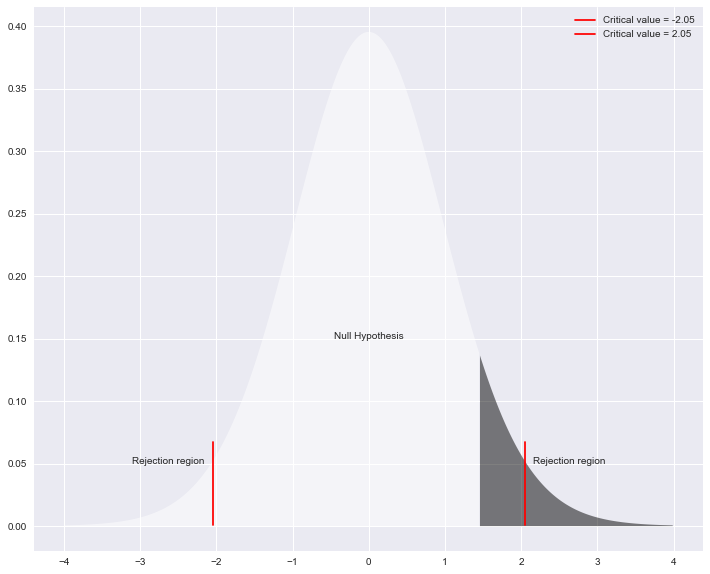

In [40]:
# a)
n = len(a)
SE = stats.sem(a)
mean = np.mean(a)
val = stats.ttest_1samp(a, 130)

alpha = 0.05
stat = abs(round(val[0],2))
pvalue = round(val[1],3)
crit = abs(round(stats.t.ppf(alpha/2,n-1), 2))

plt.figure(figsize=(12,10))

plt.fill_between(x=np.arange(stat,4,0.01), 
                 y1= stats.t.pdf(np.arange(stat,4,0.01),n-1) ,
                 facecolor='black',
                 alpha = 0.5)

plt.fill_between(x=np.arange(-4,stat,0.01), 
                 y1= stats.t.pdf(np.arange(-4,stat,0.01),n-1) ,
                 facecolor='white',
                 alpha=0.5)

xcoords = [-crit, crit]
colors = ['r','r']

for xc,c in zip(xcoords,colors):
    plt.axvline(x=xc, label='Critical value = {}'.format(xc), c=c, ymax = 0.2, ymin = 0.047)

plt.legend()
            
plt.text(x=0, y=0.15, s= "Null Hypothesis", ha = 'center')
plt.text(x=crit*1.05, y=0.05, s= "Rejection region")
plt.text(x=-crit*1.05, y=0.05, s= "Rejection region", ha = 'right')
plt.show()

1. $\quad H_0: \mu = 130$ <br/> $\quad H_1: \mu \neq 130$

2. $\quad \alpha =$ {{alpha}}

3. $\quad p-value =$ {{pvalue}} and $stat =$ {{stat}}

4. $\quad$Reject if p-value < {{alpha}} or if stat > {{crit}}

5. $\quad$We fail to reject the null hypothesis since {{pvalue}} > {{alpha}} and conclude that we do not have sufficient evidence to support the claim  that the average <br/> $\quad$sodium content of this brand of cornflakes differs significantly from 139 milligrams

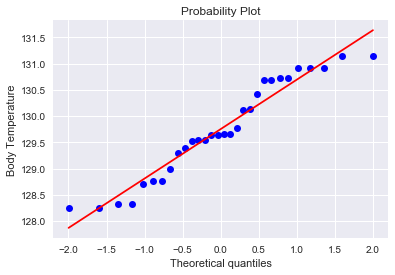

Skewness = -0.101
Kurtosis = -1.1492


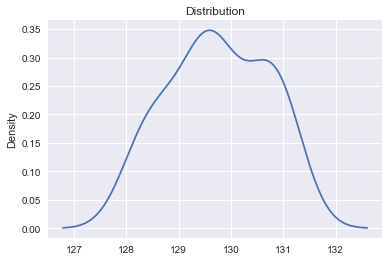

In [19]:
# b) We check for normality using a normal probability plot and compute skewness and kurtosis and then create a plot of the pdf
stats.probplot(a, plot=plt)
plt.ylabel('Body Temperature')
plt.show()
print('Skewness = ' + repr(round(stats.skew(a),4)))
print('Kurtosis = ' + repr(round(stats.kurtosis(a),4)))
df = pd.DataFrame(a)
fig, ax = plt.subplots()
df.plot.kde(ax=ax, legend=False, title='Distribution');

In [20]:
# c) Skip

In [21]:
# d) skip

A 95 % confidence interval for the sample mean is [129.406 ; 130.1]


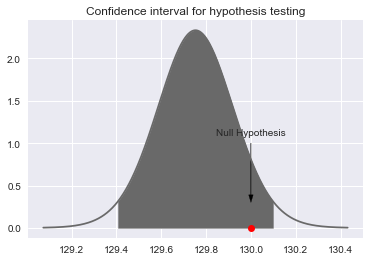

Since the hypothesised value lies in the confidence interval we fail to reject


In [22]:
# e) Setup a 95 % CI on the mean and use it to test the null hypothesis

n = len(a)
SE = stats.sem(a)
mean = np.mean(a)
Level = 0.95

CI = stats.t.interval(Level, n-1, loc=mean, scale=SE)

print('A ' + repr(int(Level*100)) + ' % confidence interval for the sample mean is [' + repr(round(CI[0],3)) + ' ; '
      + repr(round(CI[1],3)) + ']')

x = np.linspace(mean-4*SE, mean+4*SE, 1000)
z = x[(CI[0] <= x) & (x <= CI[1])]
y = stats.t.pdf(x,n-1, mean, SE)
plt.plot(x,y, color = 'dimgrey')
plt.fill_between(z, stats.t.pdf(z,n-1, mean,SE), color = 'dimgrey')
plt.title('Confidence interval for hypothesis testing')
plt.plot(130, 0, 'ro')
plt.arrow(130, 1, 0, -0.7, length_includes_head = True, head_width = 0.02, head_length = 0.09, color='k')
plt.text(x=130, y=1.1, s= "Null Hypothesis", ha = 'center')
plt.show()



print('Since the hypothesised value lies in the confidence interval we fail to reject')

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in sqrt
  


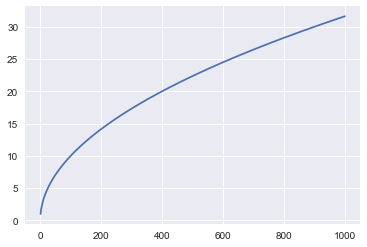

In [10]:
x = np.linspace(-1000, 1000, 1000)
y = x**(1/2)
plt.plot (x,y)